In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
rate = pd.read_csv('C:/Users/Mahendra/Desktop/Mahendra/Mahendra/Test-22-02-2021/Test1/make_rate.csv')
rate.head()

,products,process,months,rate
0,700,18,5,1
1,600,34,4,0
2,200,18,2,0
3,600,12,3,0
4,263,60,4,0


In [4]:
rate.describe()

,products,process,months,rate
count,100.000000,100.000000,100.00000,100.000000
mean,1136.540000,25.950000,5.65000,0.490000
std,675.049469,13.920681,3.32233,0.502418
min,100.000000,7.000000,1.00000,0.000000
25%,590.000000,13.750000,3.00000,0.000000
50%,1000.000000,25.000000,5.00000,0.000000
75%,1666.250000,34.250000,8.00000,1.000000
max,2450.000000,60.000000,12.00000,1.000000


In [4]:
#rate['rate'].value_counts()
rate['rate'].nunique()

2

In [6]:
x= rate[['products','process','months']]
y= rate['rate']
x1 = sm.add_constant(x)
logit_model = sm.Logit(y,x1)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.291815
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   rate   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                  0.5789
Time:                        12:51:28   Log-Likelihood:                -29.182
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 2.745e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0597      1.495     -0.040      0.968      -2.991       2.871
products       0.0015      0.

In [7]:
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2

In [8]:
# G - Statistics
import math
g = -2*(-69.295-(-29.182))
chi2.pdf(g,3)

1.355854487456038e-17

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
x= rate[['products','process','months']]
y= rate['rate'].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=88)

In [49]:
y_test

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

In [12]:
model = LogisticRegression(solver='lbfgs')
result = model.fit(x_train,y_train.ravel())

In [13]:
y_predict = result.predict(x_test)
y_predict

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [14]:
y_prob_train = result.predict_proba(x_train)[:,1]
y_prob_train

array([0.18092943, 0.97841966, 0.48171696, 0.00292845, 0.28459905,
       0.02753149, 0.04509968, 0.09937979, 0.87570896, 0.01981448,
       0.57113521, 0.45932085, 0.84195693, 0.99495843, 0.02415172,
       0.61784242, 0.02478183, 0.07336159, 0.01971447, 0.02685155,
       0.9681123 , 0.94551653, 0.95962542, 0.98826317, 0.98867256,
       0.0579675 , 0.74512048, 0.01068966, 0.87965204, 0.99464657,
       0.14549771, 0.95948161, 0.9958422 , 0.42104487, 0.98379848,
       0.97699252, 0.57080654, 0.97778621, 0.0015025 , 0.02688472,
       0.82917323, 0.01491674, 0.4122426 , 0.12569617, 0.93278797,
       0.00741452, 0.01039163, 0.98259376, 0.00361378, 0.95163254,
       0.01846888, 0.02849993, 0.35948518, 0.97266854, 0.87511322,
       0.44359584, 0.6869837 , 0.03581589, 0.78660502, 0.99464657,
       0.07479595, 0.98326324, 0.89626052, 0.82786055, 0.02171684,
       0.89642531, 0.07003136, 0.61130819, 0.9985297 , 0.0028316 ,
       0.95433514, 0.00396245, 0.99310951, 0.94126739, 0.89944

In [15]:
y_prob = result.predict_proba(x_test)[:,1]
y_prob.reshape(-1,1)
y_prob

array([0.1172071 , 0.08229653, 0.30985548, 0.81982493, 0.08962971,
       0.98541676, 0.99663573, 0.70587909, 0.03154822, 0.02095573,
       0.24686938, 0.00857812, 0.72154593, 0.538699  , 0.05434646,
       0.99851954, 0.99473614, 0.00857812, 0.02634166, 0.13956686])

In [16]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predict)

In [17]:
score

0.8

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[10,  2],
       [ 2,  6]], dtype=int64)

In [19]:
tn ,fp,fn,tp = confusion_matrix(y_test,y_predict).ravel()

In [20]:
tn,fp,fn,tp

(10, 2, 2, 6)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.75      0.75      0.75         8

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.79        20
weighted avg       0.80      0.80      0.80        20



In [23]:
accuracy = (tp+tn)/(tp+fp+fn+tn)
accuracy 

0.8

In [25]:
specificity = tn/(tn+tp)
specificity

0.625

In [26]:
sensitivity = tp/(tp+fn)
sensitivity

0.75

In [29]:
y_predict_train = model.predict(x_train)
y_predict

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

Log_Roc_Auc = roc_auc_score(y_train,y_predict_train)
fpr1 ,tpr1, thereshold1 =roc_curve(y_train,y_prob_train) 
roc_auc1 = auc(fpr1,tpr1)

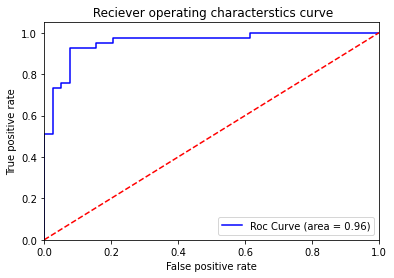

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr1,tpr1, color='blue', label = 'Roc Curve (area = %0.2f)' % roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(' Reciever operating characterstics curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
y_train

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

In [52]:
y_prob_train

array([0.18092943, 0.97841966, 0.48171696, 0.00292845, 0.28459905,
       0.02753149, 0.04509968, 0.09937979, 0.87570896, 0.01981448,
       0.57113521, 0.45932085, 0.84195693, 0.99495843, 0.02415172,
       0.61784242, 0.02478183, 0.07336159, 0.01971447, 0.02685155,
       0.9681123 , 0.94551653, 0.95962542, 0.98826317, 0.98867256,
       0.0579675 , 0.74512048, 0.01068966, 0.87965204, 0.99464657,
       0.14549771, 0.95948161, 0.9958422 , 0.42104487, 0.98379848,
       0.97699252, 0.57080654, 0.97778621, 0.0015025 , 0.02688472,
       0.82917323, 0.01491674, 0.4122426 , 0.12569617, 0.93278797,
       0.00741452, 0.01039163, 0.98259376, 0.00361378, 0.95163254,
       0.01846888, 0.02849993, 0.35948518, 0.97266854, 0.87511322,
       0.44359584, 0.6869837 , 0.03581589, 0.78660502, 0.99464657,
       0.07479595, 0.98326324, 0.89626052, 0.82786055, 0.02171684,
       0.89642531, 0.07003136, 0.61130819, 0.9985297 , 0.0028316 ,
       0.95433514, 0.00396245, 0.99310951, 0.94126739, 0.89944